In [5]:
# imports
from IPython.display import Image, display
from bokeh.plotting import figure, show, output_file
from bokeh.io import push_notebook, show, output_notebook
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [ ]:
# part 0

Although the following plots have not been published, 


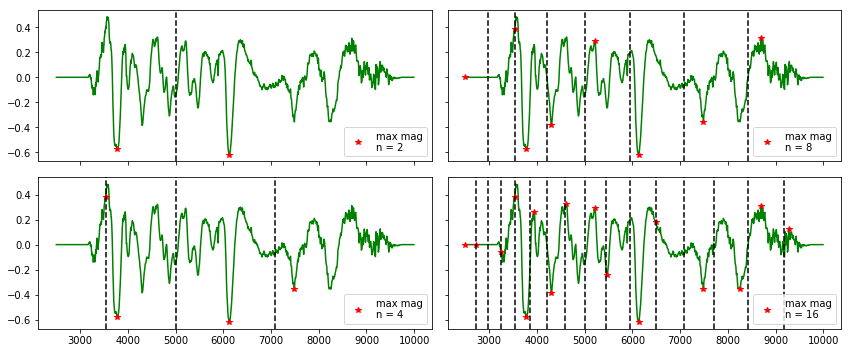

In [14]:
# part 1

print('''Although the following plots have not been published, ''')

display(Image(filename='hw_2_data/max_mag.png'))

In [78]:
# load spectrum file
spec = np.genfromtxt('hw_2_data/SN1997y-proc.txt')
wavp = spec[:,0]
specp = spec[:,1]

# define helper function
def feat_vals(spec, n_reg = 8, return_idx = False, wav = None):
    '''break into n_reg regions and extract min/max'''
    
    # split the spectrum into n_reg regions:
    sspec = np.split(spec, n_reg)
    
    # find the location of maximum magnitude point in each regions
    mmp_locs = np.argmax(np.abs(sspec),axis=1)
    
    # return array of maximum magnitue point for each region
    if return_idx is False:
        return np.array([sspec[idx][mmp] for idx, mmp in enumerate(mmp_locs)])
    else:
        swav = np.split(wav, n_reg)
        return np.array([swav[idx][mmp] for idx, mmp in enumerate(mmp_locs)]), np.array([sspec[idx][mmp] for idx, mmp in enumerate(mmp_locs)])

output_notebook()

# make bokeh plot
ylim = (-0.7,0.7)
p = figure(title="Spectrum of SN1997Y with Different Sampling Schemes", plot_height=300, plot_width=600, y_range=ylim)

# plot processed spectrum
r = p.line(wavp, specp, color='green', line_width=2)

# instantiate placeholders for markers and vertical divider lines
dots = p.asterisk([],[],color='red',size=12)
vlines = p.vbar([],None,ylim[1],bottom=ylim[0],color='black',line_dash='dashed')

# define update function
def update_fn(method, n=2):
   
    # find the wavelength and flux values at the (logarithmic) midpoints in wavelength
    #     space of each bin
    if method == 'mid':
        wav_vals = wavp[int(len(specp)/(2*n))::int(len(specp)/n)]
        vals = specp[int(len(specp)/(2*n))::int(len(specp)/n)]

    elif method == 'max_mag':
        wav_vals, vals = feat_vals(specp, n_reg = n, return_idx = True, wav = wavp)
    
    dots.data_source.data['x'] = wav_vals
    dots.data_source.data['y'] = vals
    vlines.data_source.data['x'] = wavp[int(len(wavp)/n)::int(len(wavp)/n)]
    push_notebook()

show(p, notebook_handle=True)

Loading BokehJS ...

In [79]:
interact(update_fn, method=["mid","max_mag"], n=[2,4,8,16])

interactive(children=(Dropdown(description='method', options=('mid', 'max_mag'), value='mid'), Dropdown(description='n', options=(2, 4, 8, 16), value=2), Output()), _dom_classes=('widget-interact',))

<function __main__.update_fn>

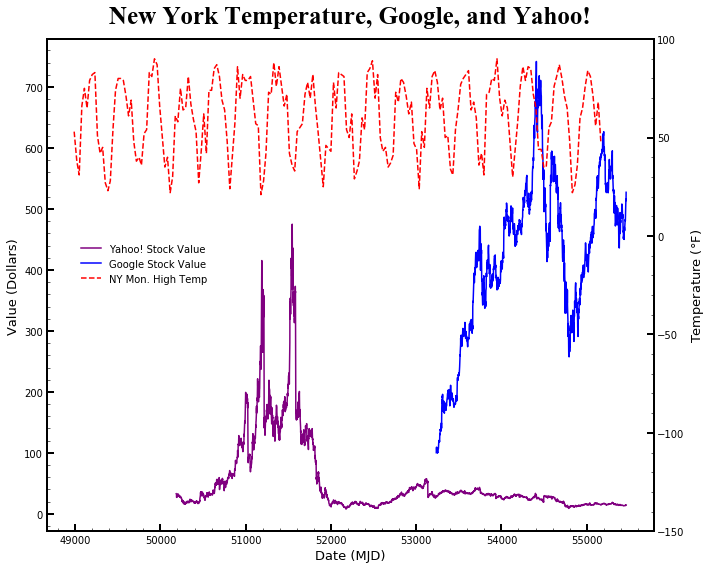

In [74]:
# part 2

# read in data
ny = np.genfromtxt('hw_2_data/ny_temps.txt', names=['MJD','max_temp'], skip_header=1)
yh = np.genfromtxt('hw_2_data/yahoo_data.txt', names=['MJD','stock_val'], skip_header=1)
goog = np.genfromtxt('hw_2_data/google_data.txt', names=['MJD','stock_val'], skip_header=1)

# create figure and axis for the plot
fig, ax = plt.subplots(1,1, figsize=(10,8))

# create second axis for the temperature data to sit atop the primary axis
axT = ax.twinx()

# plot data
ax.plot(yh['MJD'], yh['stock_val'], 'purple', label = 'Yahoo! Stock Value')
ax.plot(goog['MJD'], goog['stock_val'], 'blue', label = 'Google Stock Value')
axT.plot(ny['MJD'], ny['max_temp'], 'r--', label = 'NY Mon. High Temp')

# set axis limits
axT.set_ylim((-150,100))

# adjust axis ticks
ax.tick_params(direction='in', which='both')
ax.tick_params(which='major', width=2, length=7)
ax.tick_params(which='minor', length=3)
ax.xaxis.set_minor_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(20))
axT.tick_params(direction='in', which='both')
axT.tick_params(which='major', width=2, length=7)
axT.tick_params(which='minor', length=3)
axT.yaxis.set_minor_locator(MultipleLocator(10))

# make axis box a thicker line width
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

# add labels
ttl = ax.title
ttl.set_position((0.5,1.02))
ax.set_title('New York Temperature, Google, and Yahoo!')
ax.set_xlabel('Date (MJD)')
ax.set_ylabel('Value (Dollars)')
axT.set_ylabel(r'Temperature ($\degree$F)')

# adjust font sizes and styles
ax.title.set_fontsize(25)
ax.title.set_fontweight('heavy')
ax.title.set_fontname('Times New Roman')
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)
axT.yaxis.label.set_fontsize(13)

# add legend
fig.legend(frameon=False, bbox_to_anchor=(0.30,0.58))

# tight layout
plt.tight_layout()